# 2023 5월 주식 데이터 리뷰

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 주식 메타 데이터 불러오기

### 데이터 분석 방향


 보통 월간 데이터를 살펴볼 때 월 시작시 수집된 메타데이터와 월 시작, 종료시 모멘텀 데이터들을 기준으로 분석을 진행합니다.
 모멘텀은 한 달간 얼마나 상승했는지를 나타냅니다.


In [2]:
df = pd.read_csv('./data/202305_stock_meta.csv')
df = df[df.code != 50090] # 비케이홀딩스 무상감자 제외

In [3]:
df.head(5)

,RR,dt,ROA,code,OIGR,ROE,name,PER,N,PBR,m30_5,m30_6
0,1215.5,20230501,4.75,20,32.98,5.73,동화약품,11.48,547,0.64,1.009443,1.162903
1,-56.6,20230501,-8.19,40,-131.11,-19.06,KR모터스,-9.71,993,1.94,1.390396,1.001951
2,5633.7,20230501,0.35,50,-40.71,0.59,경방,65.59,484,0.35,0.986201,0.980332
3,3792.7,20230501,2.35,70,-62.38,4.01,삼양홀딩스,9.44,284,0.33,1.005753,0.955181
4,240.2,20230501,2.49,80,9.45,7.72,하이트진로,18.22,166,1.34,0.994789,1.020449


## 각 특성 데이터별 N분위 데이터로 변환

각 수치들이 실수데이터를 갖기때문에
상대적인 크기를 비교하기 위해 N분위로 표기하도록 변경합니다

In [4]:
N = 30
df['RR_qt'] = pd.qcut(df['RR'], N, labels=False)
df['ROA_qt'] = pd.qcut(df['ROA'], N, labels=False)
df['OIGR_qt'] = pd.qcut(df['OIGR'], N, labels=False)
df['ROE_qt'] = pd.qcut(df['ROE'], N, labels=False)
df['PER_qt'] = pd.qcut(df['PER'], N, labels=False)
df['PBR_qt'] = pd.qcut(df['PBR'], N, labels=False)
df['m5_qt'] = pd.qcut(df['m30_5'], N, labels=False)
df['m6_qt'] = pd.qcut(df['m30_6'], N, labels=False)

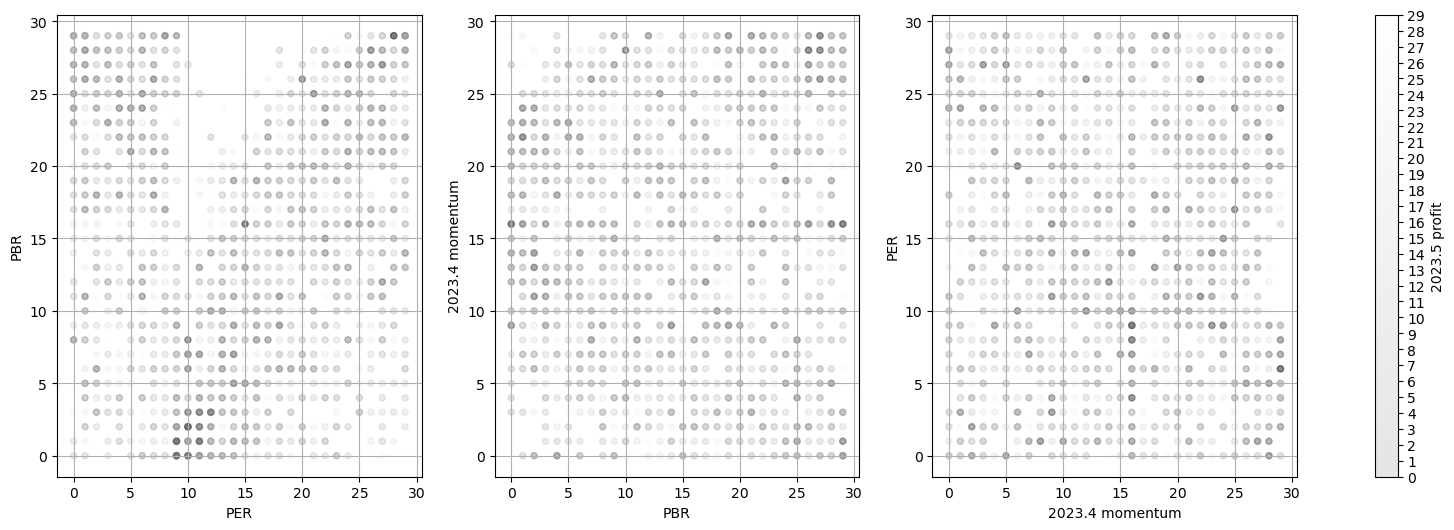

In [5]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(20, 6), ncols=3)

axes[0].scatter(df['PER_qt'], df['PBR_qt'], s=20, c=df['m6_qt'], cmap='gray', alpha=0.1)
axes[1].scatter(df['PBR_qt'], df['m5_qt'], s=20, c=df['m6_qt'], cmap='gray', alpha=0.1)
axes[2].scatter(df['m5_qt'], df['PER_qt'], s=20, c=df['m6_qt'], cmap='gray', alpha=0.1)

axes[0].set_xlabel('PER')
axes[0].set_ylabel('PBR')

axes[1].set_xlabel('PBR')
axes[1].set_ylabel('2023.4 momentum')

axes[2].set_xlabel('2023.4 momentum')
axes[2].set_ylabel('PER')
#set colormap in axes
cbar = fig.colorbar(axes[0].collections[0], ax=axes)
cbar.set_ticks(np.arange(0, 30, 1))
cbar.set_ticklabels(np.arange(0, 30, 1))
cbar.set_label('2023.5 profit')
for ax in axes: ax.grid()

각 점에 여러 주식들이 겹칠 수 있고, 겹쳐진 주식의 수익률도 보일 수 있도록 투명도를 주었습니다.

평균적으로 띄는 색갈이 해당 분위에 해당하는 평균 수익률에 해당하는 색으로 이해하면 됩니다.

사실 4월 모멘텀이 이번달에는 크게 도움이 되지 못한듯 합니다. 모멘텀 기준 차트를 보면, 직전달 높은 모멘텀이 오히려 수익이 저조한 것처럼 보입니다. 지난달까지 직전달 모멘텀이 큰 영향이 있었는데

시장에서 어느정도 섹터가 돌고있구나라는 생각으로 이어질 수도 있을 것 같습니다. 

<Axes: xlabel='ROE_qt'>

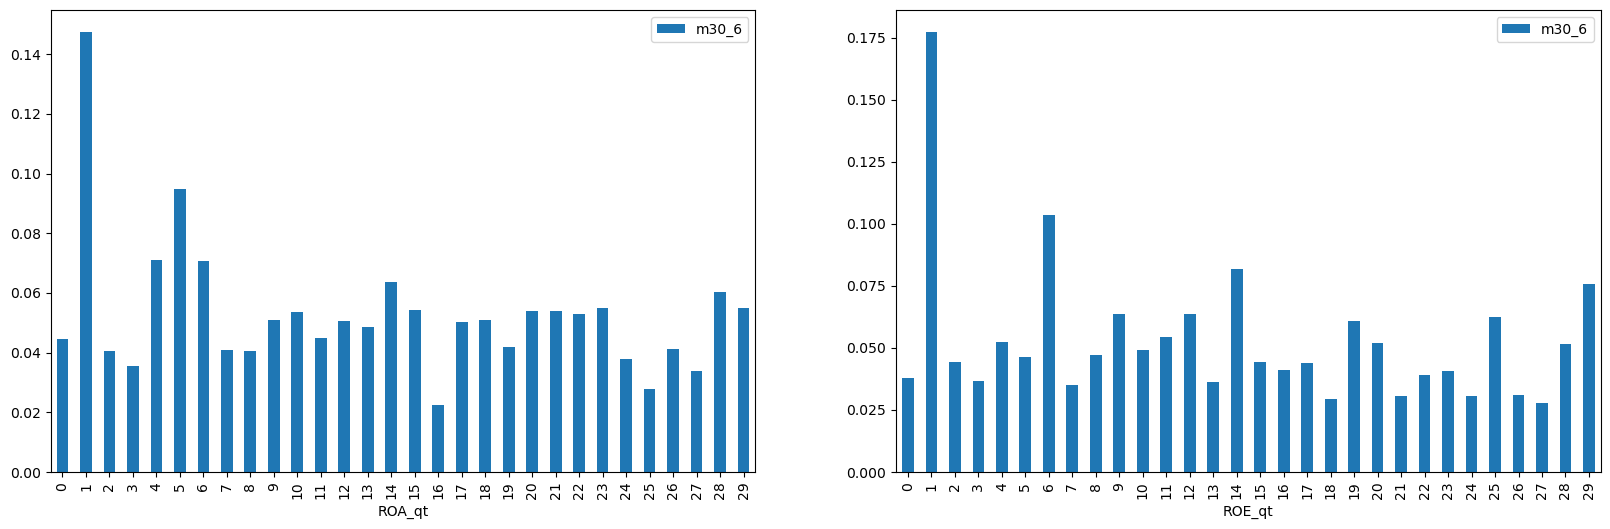

In [6]:
fig, axes = plt.subplots(figsize=(20, 6), ncols=2)
(df.groupby(['ROA_qt']).agg({'m30_6':'mean'}) - 1).plot(kind='bar', ax=axes[0])
(df.groupby(['ROE_qt']).agg({'m30_6':'mean'}) - 1).plot(kind='bar', ax=axes[1])

- ROE, ROA가 낮을수록 오히려 수익률이 좋았습니다. 

<Axes: xlabel='OIGR_qt'>

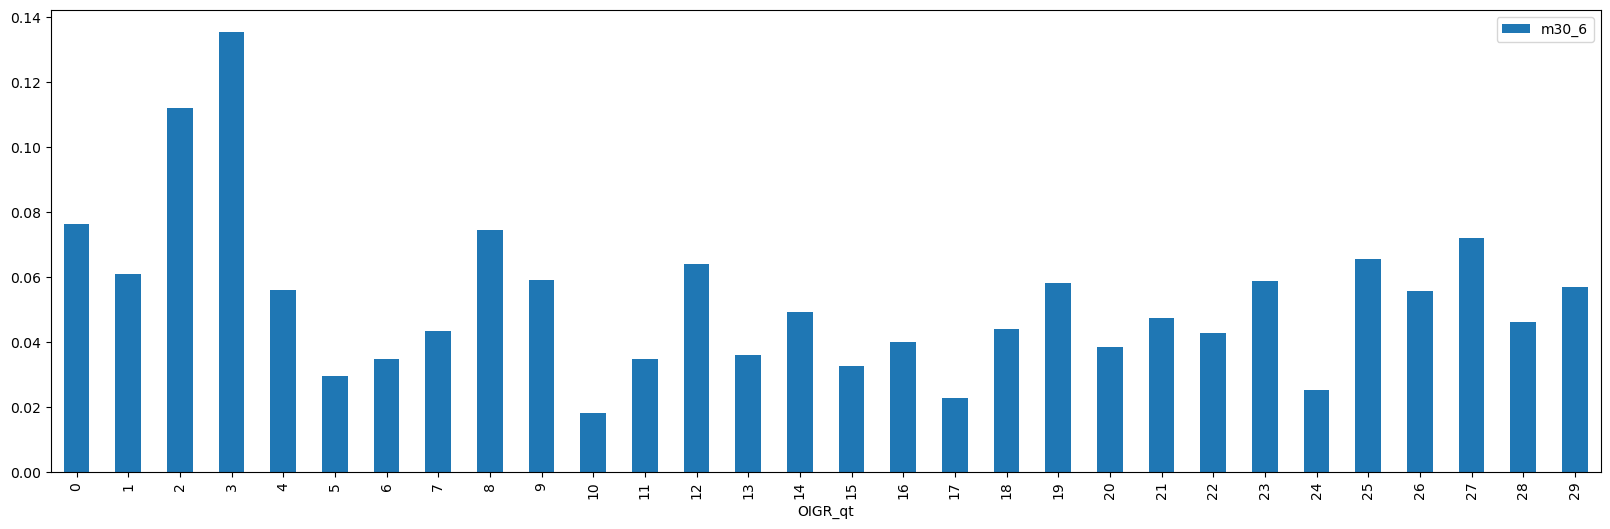

In [7]:
fig, axes = plt.subplots(figsize=(20, 6))
(df.groupby(['OIGR_qt']).agg({'m30_6':'mean'})-1).plot(kind='bar', ax=axes)

- 영업이익 증가율에 대한 수익률입니다. 
- 해당 수치도 오히려 기대와 반대되는 수익률 양상을 보이고 있습니다. 
- 수집된 메타가 과거 데이터고, 그 사이 시장에 나타난 이벤트들과 발생된 추세가 많이 다른것을 볼 수 있습니다. 


<Axes: xlabel='m5_qt'>

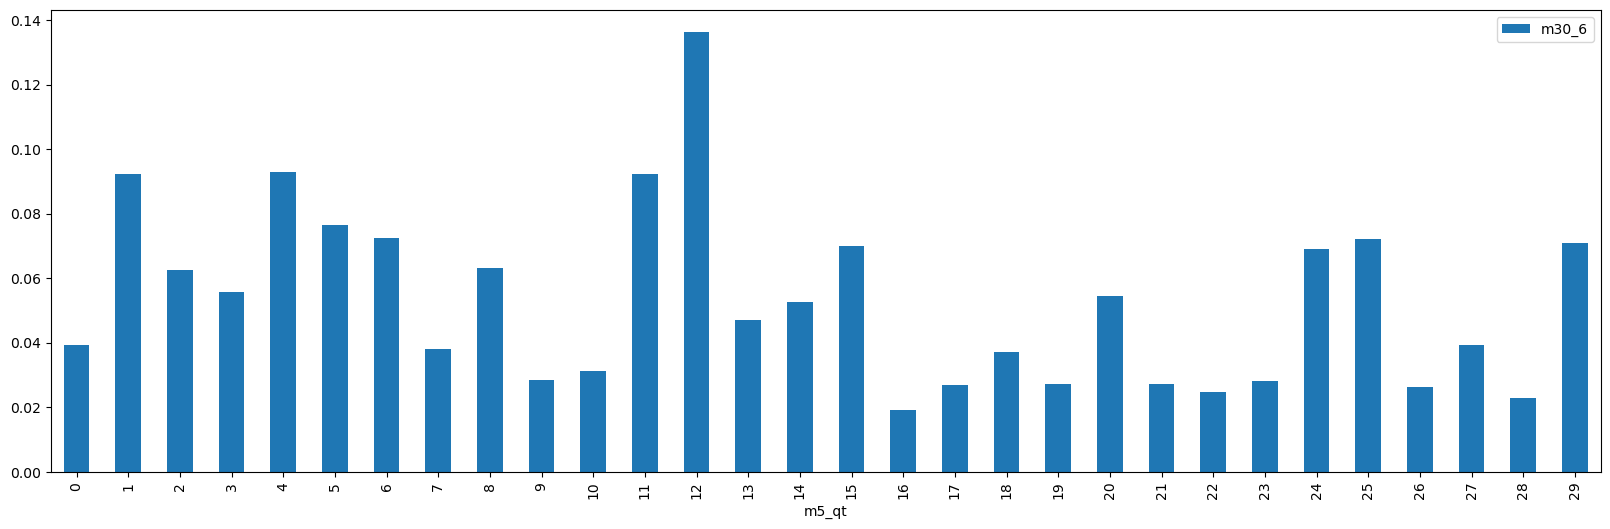

In [8]:
fig, axes = plt.subplots(figsize=(20, 6))
(df.groupby(['m5_qt']).agg({'m30_6':'mean'})-1).plot(kind='bar', ax=axes)

In [9]:
pbr_filter = (df['PBR_qt'] < df['PBR_qt'].mean())
per_filter = (df['PER_qt'] < df['PER_qt'].mean())
roa_filter = (df['ROA_qt'] < df['ROA_qt'].mean())
roe_filter = (df['ROE_qt'] < df['ROE_qt'].mean())
m5_filter = (df['m5_qt'] > df['m5_qt'].mean())
print(f'전체 주식 평균 수익률 : {df["m30_6"].mean():,.2f}\n'
      f'PER + PBR + 모멘텀  필터링 평균 수익률: {df[pbr_filter & per_filter & m5_filter]["m30_6"].mean():,.2f}\n'
      f'PER + PBR 필터링 평균 수익률 : {df[pbr_filter & per_filter]["m30_6"].mean():,.2f}\n'
        f'ROA + ROE  필터링 평균 수익률 : {df[roa_filter & roe_filter ]["m30_6"].mean():,.2f}\n')

전체 주식 평균 수익률 : 1.05
PER + PBR + 모멘텀  필터링 평균 수익률: 1.03
PER + PBR 필터링 평균 수익률 : 1.03
ROA + ROE  필터링 평균 수익률 : 1.06

